In [156]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt


In [166]:
img=cv2.imread('./test_images/h1.jpg')
img.shape

(275, 183, 3)

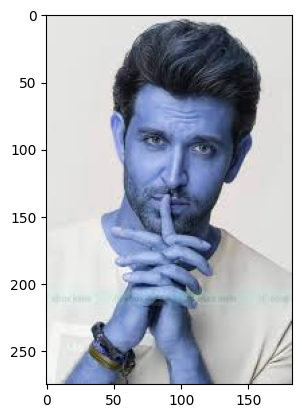

In [167]:
plt.imshow(img)

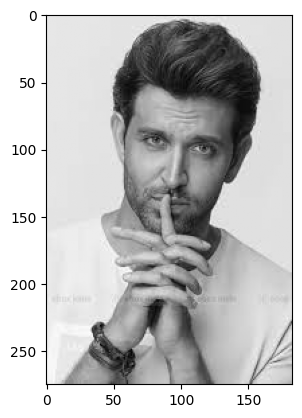

In [168]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')

In [169]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 46,  58, 103, 103]])

In [170]:
(x,y,w,h)=faces[0]
x,y,w,h

(46, 58, 103, 103)

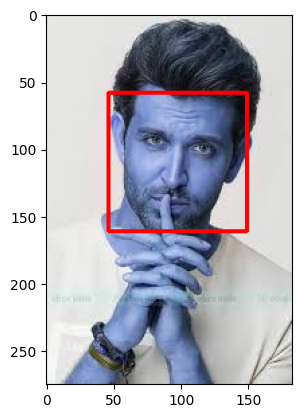

In [171]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

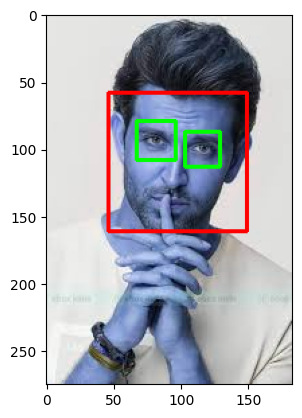

In [172]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

### (2) Crop the facial region of the image and create a  function 

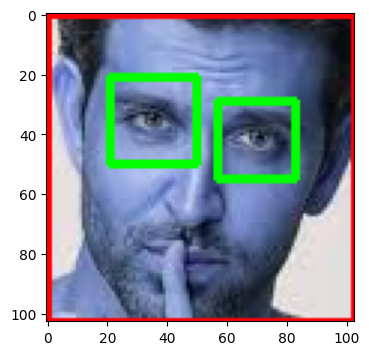

In [173]:
plt.figure(figsize=(4,4))
plt.imshow(roi_color,cmap='gray')

### Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [174]:
def get_cropped_image_if_2_eyes(img_path):
    img=cv2.imread(img_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color
            

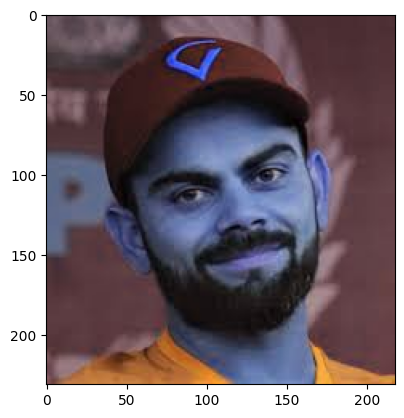

In [175]:
original_image=cv2.imread('./test_images/v.jpg')
plt.imshow(original_image)

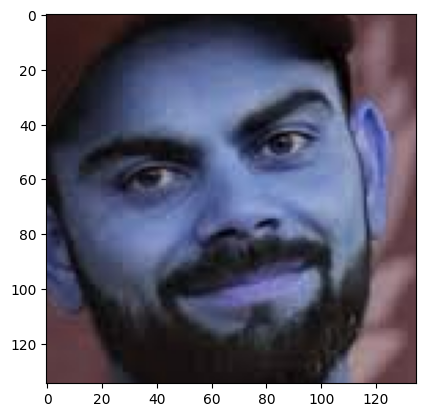

In [176]:
cropped_img=get_cropped_image_if_2_eyes('./test_images/v.jpg')
plt.imshow(cropped_img)

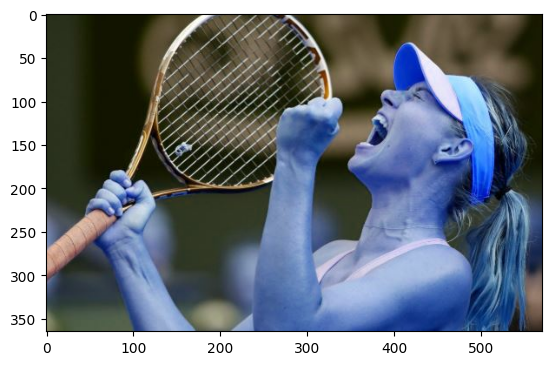

In [177]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [178]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes


#it will return null because image not good to detect 2 eyes

### Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

In [179]:
dataset_path='./dataset/'
cropped_img_path='./dataset/cropped/'

In [180]:
import os
img_dirs=[]
for entry in os.scandir(dataset_path):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [181]:
img_dirs

['./dataset/.ipynb_checkpoints',
 './dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

### Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code

In [182]:
import shutil
if os.path.exists(cropped_img_path):
    shutil.rmtree(cropped_img_path)
os.mkdir(cropped_img_path)

In [183]:
cropped_image_dirs=[]
celebrity_file_names_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=cropped_img_path+celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('generating cropped images in folder:',cropped_folder)
            cropped_file_name=celebrity_name+str(count)+'.png'
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1

generating cropped images in folder: ./dataset/cropped/lionel_messi
generating cropped images in folder: ./dataset/cropped/maria_sharapova
generating cropped images in folder: ./dataset/cropped/roger_federer
generating cropped images in folder: ./dataset/cropped/serena_williams
generating cropped images in folder: ./dataset/cropped/virat_kohli


### Now you should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [184]:
celebrity_file_names_dict={}
for img_dir in cropped_image_dirs:
    celebrity_name=img_dir.split('/')[-1]
    file_list=[]
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name]=file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [185]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}